In [1]:
#from memory_profiler import profile
import fzMPI

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import numpy as np

import compute_charge_dist as fz

%matplotlib inline

In [2]:
grain_type = "carbonaceous"
#grain_type = "silicate"
grain_size = [5, 100, 1000]
#grain_size = [5, 100, 200]
G0         = 1.68

#Qabs5    = fz.get_QabsTable(grain_type, 5, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")
#Qabs100  = fz.get_QabsTable(grain_type, 100, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")
#Qabs1000 = fz.get_QabsTable(grain_type, 1000, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")
Qabs5    = fz.get_QabsTable(grain_type, 5)
Qabs100  = fz.get_QabsTable(grain_type, 100)
Qabs1000 = fz.get_QabsTable(grain_type, 1000)
#Qabs1000 = fz.get_QabsTable(grain_type, 200)

Qabs = [Qabs5, Qabs100, Qabs1000]

I'm looking for a grain size smaller than 10 Angstrom. Outside the tabulated data!!!
Extrapolating is kinda not working so taking the Qabs, a=10 AA 


In [3]:
kb = 1.38e-16   # erg K-1
mp = 1.672e-24  # g
mH = 1.6733e-24 # g 
me = 9.109e-28  # g
echarge = 4.8032e-10 # esu [cm3/2 g1/2 s-1]

In [4]:
#CMM conditions

grain_size = 167.1792046

nH    = 1.0         # in cm-3
nC    = nH * 1.0e-4 
T     = 100.        # in Kelvin
xHp   = 1.0       #1.0e-3     # electron fraction.
xCp   = 0.0
Ndust = 0.0
Av    = 0.0
fH2shield = 0.0
GG    = 0.0
xH2   = 0.0

grain_type = "silicate"

mu = 1.0    # mean mass per particle, un units of proton masses.
mm = mu * mp  # particle mass

tau = grain_size*fz.AAtocm*kb*T / echarge**2
print(tau)

0.0999999999775


In [5]:
Qabs = fz.get_QabsTable(grain_type, grain_size)

zeta = 0.0

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], xH2, T, zeta, grain_size, Av, grain_type, Qabs, G0=GG)
JCRe, JCRpe, ZZnew     = fz.compute_CR_currents(nH, fH2shield, zeta, grain_size, grain_type, Qabs)

zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, JCRe, JCRpe, ZZall, grain_size, grain_type)
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], xH2, T, zeta, grain_size, Av, grain_type, Qabs, fH2shield, zeq=zeq, includeCR=False)
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,JCRe,JCRpe, ZZall, new_zmin, new_zmax, includeCR=False)

Zm     = fz.get_Zmode(ZZ, ffz)
zmode  = Zm

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
zmean     = avg
zstd      = std

ffz = np.concatenate([[0.0],ffz,[0.0]])
ZZ = np.concatenate([[ZZ[0]-1], ZZ, [ZZ[-1]+1]]) 

In [22]:
ZZ_DS = np.array([-4, -3, -2, -1, -0, 1, 2])
fz_tau01 = np.array([1.0e-9, 2.5e-7, 0.02, 0.88, 0.1, 5.0e-4, 1.0e-9])

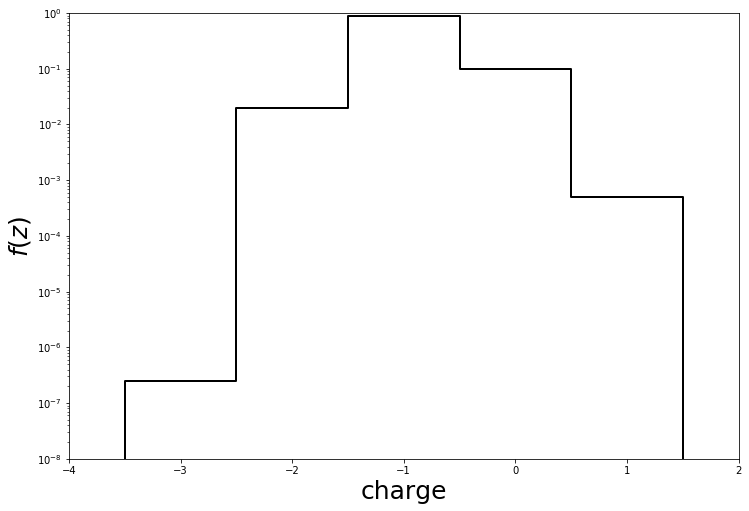

In [30]:
fig = plt.figure(figsize=(12,8.2))

ax = fig.add_subplot(111)

ax.plot(ZZ_DS+0.5, fz_tau01, "-k", linewidth=2, drawstyle='steps')
#ax.plot(ZZ+0.5, ffz, "-r", linewidth=2, drawstyle='steps')

ax.set_ylim(1.0e-8, 1.0e0)

ax.set_xlim(-4, 2)

ax.set_xlabel("charge", fontsize=25)
ax.set_ylabel("$f(z)$", fontsize=25)

ax.set_yscale("log")

fig.show()

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/tau01_Draine.pdf", format="pdf", transparent=True)

In [32]:
ZZ_DS = np.array([-10,  -9, -8, -7, -6, -5, -4, -3, -2, -1, -0, 1, 2, 3,])
fz_tau1 = np.array([1.0e-9, 1.5e-6, 1.0e-4, 4.0e-3, 0.04, 0.2, 0.4, 0.27, 0.07, 0.007, 2.0e-4, 4.0e-6, 2.0e-8, 1.0e-9])

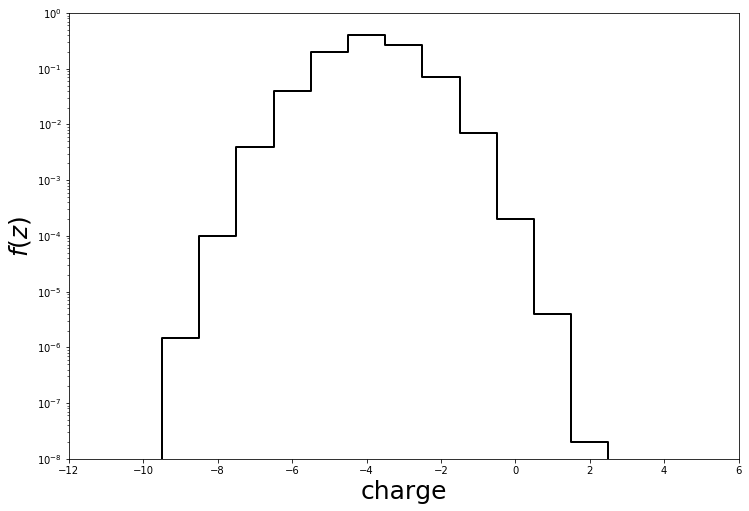

In [36]:
fig = plt.figure(figsize=(12,8.2))

ax = fig.add_subplot(111)

ax.plot(ZZ_DS+0.5, fz_tau1, "-k", linewidth=2, drawstyle='steps')
#ax.plot(ZZ+0.5, ffz, "-r", linewidth=2, drawstyle='steps')

ax.set_ylim(1.0e-8, 1.0e0)

ax.set_xlim(-12, 6)

ax.set_xlabel("charge", fontsize=25)
ax.set_ylabel("$f(z)$", fontsize=25)

ax.set_yscale("log")

fig.show()

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/tau1_Draine.pdf", format="pdf", transparent=True)

In [97]:
ZZ_DS = np.linspace(-50, -9, num=41)

In [104]:
a  = 0.137
b = -1./(1.+np.sqrt(1.39e-3/10.))-2.504*10. -4
c = np.sqrt((1+2.504)/((2+2.504)*(2.504)))*np.sqrt(-1.0*b)
fz_tau10  = a* np.exp(-(ZZ_DS - b)**2/(2.* c**2))

In [105]:
print(b)

-30.0283475542


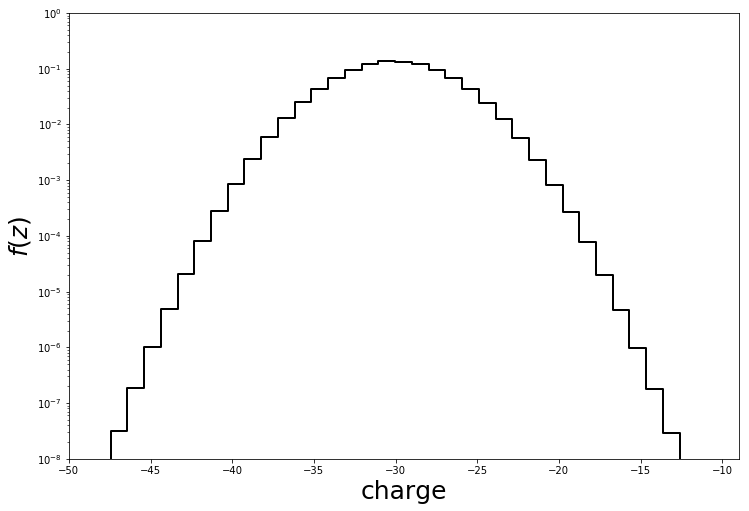

In [106]:
fig = plt.figure(figsize=(12,8.2))

ax = fig.add_subplot(111)

ax.plot(ZZ_DS+0.5, fz_tau10, "-k", linewidth=2, drawstyle='steps')
#ax.plot(ZZ+0.5, ffz, "-r", linewidth=2, drawstyle='steps')

ax.set_ylim(1.0e-8, 1.0e0)

ax.set_xlim(-50, -9)

ax.set_xlabel("charge", fontsize=25)
ax.set_ylabel("$f(z)$", fontsize=25)

ax.set_yscale("log")

fig.show()

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/tau10_Draine.pdf", format="pdf", transparent=True)